In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
housing=fetch_california_housing()

In [14]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [15]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
X_train.shape

(11610, 8)

In [20]:
model=models.Sequential(
    [
        layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
        layers.Dense(30,activation='relu'),
        layers.Dense(1)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mae'])

In [24]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5683 - mae: 0.8751 - val_loss: 2.4482 - val_mae: 0.5367
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5107 - mae: 0.5152 - val_loss: 0.6533 - val_mae: 0.4625
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4311 - mae: 0.4713 - val_loss: 0.5514 - val_mae: 0.4403
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4012 - mae: 0.4517 - val_loss: 0.4192 - val_mae: 0.4263
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3857 - mae: 0.4420 - val_loss: 0.4046 - val_mae: 0.4186
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3761 - mae: 0.4348 - val_loss: 0.3495 - val_mae: 0.4113
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3697 - mae: 0.4303 - val_loss: 0.3570 - val_mae: 0.4095
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3648 - mae: 0.4266 - val_loss: 0.3371 - val_mae: 0.4057
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [25]:
model_history.history

{'loss': [0.8532829880714417,
  0.47424352169036865,
  0.4106612205505371,
  0.3885122239589691,
  0.37320849299430847,
  0.364854097366333,
  0.35810068249702454,
  0.3534761369228363,
  0.3491204082965851,
  0.34566017985343933,
  0.34225016832351685,
  0.3392711877822876,
  0.33660224080085754,
  0.3340715169906616,
  0.331686794757843,
  0.329511821269989,
  0.32730385661125183,
  0.325213223695755,
  0.3230961561203003,
  0.3210963308811188],
 'mae': [0.6493280529975891,
  0.49291709065437317,
  0.4586498439311981,
  0.44285187125205994,
  0.43366554379463196,
  0.42730602622032166,
  0.4226568043231964,
  0.4191538691520691,
  0.41626518964767456,
  0.41370004415512085,
  0.41139742732048035,
  0.4093914031982422,
  0.4075999855995178,
  0.4058559536933899,
  0.40411093831062317,
  0.40260764956474304,
  0.4010326564311981,
  0.39947545528411865,
  0.39790186285972595,
  0.3965117037296295],
 'val_loss': [2.4482030868530273,
  0.6533344984054565,
  0.5513585805892944,
  0.4192127

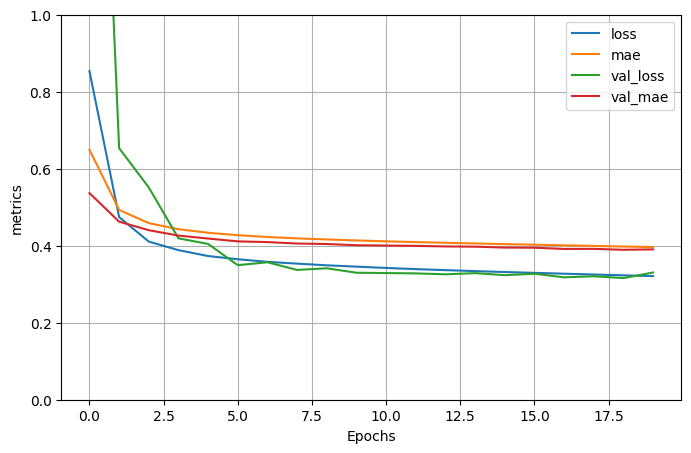

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('metrics')
plt.show()

In [28]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3301 - mae: 0.3947


[0.3315654993057251, 0.3967820405960083]

In [30]:
#rerun the epochs for reduce the loss further
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3292 - mae: 0.4019 - val_loss: 0.3175 - val_mae: 0.3877
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3273 - mae: 0.4004 - val_loss: 0.3247 - val_mae: 0.3870
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3254 - mae: 0.3989 - val_loss: 0.3397 - val_mae: 0.3874
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3235 - mae: 0.3977 - val_loss: 0.3986 - val_mae: 0.3894
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3221 - mae: 0.3965 - val_loss: 0.5256 - val_mae: 0.3922
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3209 - mae: 0.3962 - val_loss: 0.9661 - val_mae: 0.4006
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3219 - mae: 0.3955 - val_loss: 0.7209 - val_mae: 0.3946
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3182 - mae: 0.3948 - val_loss: 1.7700 - val_mae: 0.4084
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

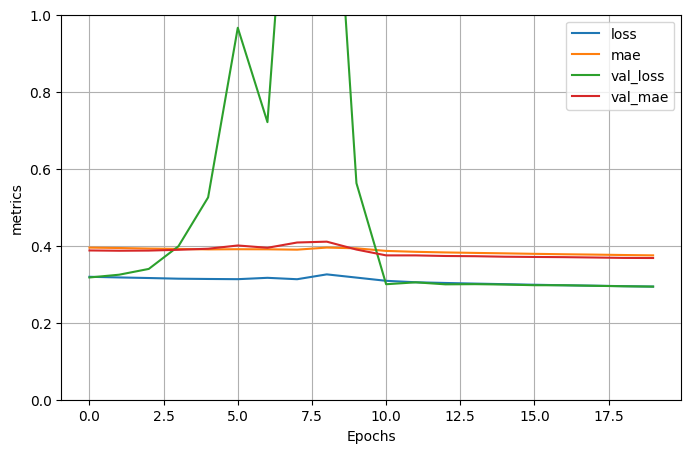

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('metrics')
plt.show()

In [32]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3032 - mae: 0.3759


[0.30717843770980835, 0.3769398331642151]

In [33]:
X_new=X_test[:3]

In [34]:
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[0.47558856]
 [1.0960032 ]
 [4.6663237 ]]
[0.477   0.458   5.00001]
